Условия лабораторной:
Вариант 7:
Параметры (a, σ^2) - (0,9); n - 60; q - 1.75; k - 3; Правило для подсчёта числа интервалов группировки - Стерджеса; Закон распределния случайной величины Y - Треугольное на отрезке (-2, 4) и модой, равной 1.

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import describe
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF


In [13]:
n = 60
a = 0
variance = 9
k = 3
q = 1.75

In [14]:
sample = np.random.normal(0, 9, 60)

print(sample)

[ -1.23484307  -9.08685379 -10.68583102  -5.85479912  11.63116072
  -3.54822716   3.04538223  -2.49606562 -18.33777239 -13.50936965
 -11.62972678   2.79124879   6.78099965  -5.31958889   3.36133013
   6.66416609  -3.30850292  -2.52291654   9.13424919   7.80725468
  -2.12356784   4.09404536  -7.08259215 -15.62231249  -2.98015423
   2.76701923   3.14835712 -10.09626094 -18.85277742   6.70199282
  -0.83039124  23.08888991  13.08961462   2.52976787   3.37774695
 -11.46348371 -11.69843628   1.0320956   10.61871747  -3.30339333
  -8.4840208    8.22834837  10.22587577  -8.75311674   3.16965772
  -0.87983376  -1.94127443  15.30675939  -1.7654837    4.07847928
   5.30178392   4.42488602   4.16598412   5.63208411   0.6807021
  -4.45727778   5.40558128   4.96411567  -7.18776879  -4.11777156]


Сумма абсолютных частот: 60.00


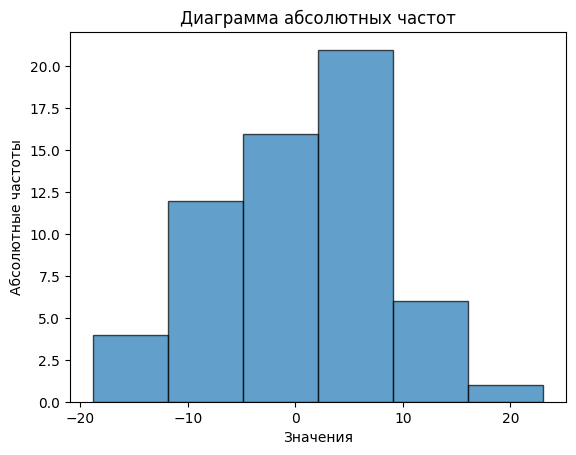

In [15]:
interval_numbers = int(1 + math.log2(n)) #количество интервалов
hist, bin_edges = np.histogram(sample, bins=interval_numbers) #интервальные границы
sum_absolute_freq = np.sum(hist) #сумма абсолютных частот
print(f"Сумма абсолютных частот: {sum_absolute_freq:.2f}")
#построение диаграммы абсолютных частот
plt.hist(sample, bins=bin_edges, edgecolor='k', alpha=0.7)
plt.xlabel('Значения')
plt.ylabel('Абсолютные частоты')
plt.title('Диаграмма абсолютных частот')
plt.show()
    

Сумма относительных частот: 1.00


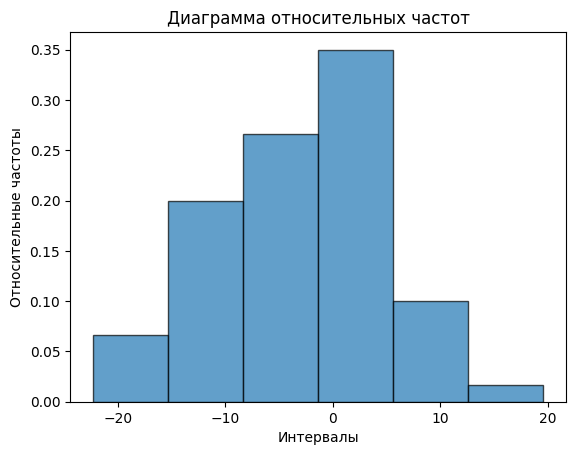

In [16]:
relative_freq = hist / n
sum_relative_freq = np.sum(relative_freq)  #сумма относительных частот
print(f"Сумма относительных частот: {sum_relative_freq:.2f}")
#построение диаграммы относительных частот
plt.bar(bin_edges[:-1], relative_freq, width=np.diff(bin_edges), edgecolor='k', alpha=0.7)
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты')
plt.title('Диаграмма относительных частот')
plt.show()

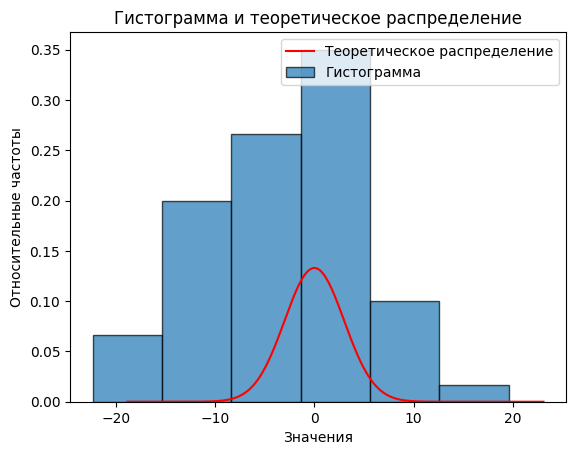

In [22]:
plt.bar(bin_edges[:-1], relative_freq, width=np.diff(bin_edges), edgecolor='k', alpha=0.7, label='Гистограмма') #построение гистограммы относительных частот
#построение теоретической кривой распределения
x = np.linspace(min(sample), max(sample), 1000)
pdf = stats.norm.pdf(x, loc=a, scale=np.sqrt(variance))
plt.plot(x, pdf, 'r', label='Теоретическое распределение')
plt.xlabel('Значения')
plt.ylabel('Относительные частоты')
plt.title('Гистограмма и теоретическое распределение')
plt.legend()
plt.show()

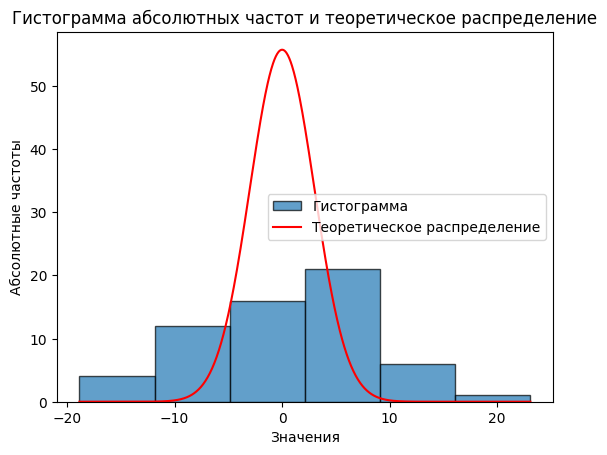

In [23]:
plt.hist(sample, bins=bin_edges, edgecolor='k', alpha=0.7, label='Гистограмма') #построение гистограммы абсолютных частот
#построение графика теоретической частоты
x = np.linspace(min(sample), max(sample), 1000)
pdf = stats.norm.pdf(x, loc=a, scale=np.sqrt(variance))
plt.plot(x, pdf * sum_absolute_freq * np.diff(bin_edges)[0], 'r', label='Теоретическое распределение')
plt.xlabel('Значения')
plt.ylabel('Абсолютные частоты')
plt.title('Гистограмма абсолютных частот и теоретическое распределение')
plt.legend()
plt.show()

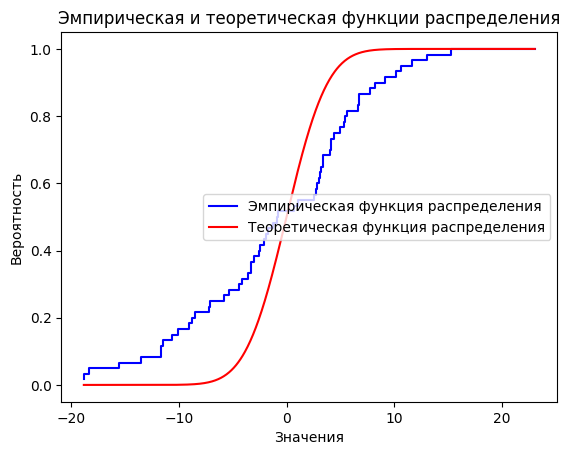

In [25]:
ecdf = ECDF(sample)
# Построение графика эмпирической функции распределения
x = np.linspace(min(sample), max(sample), 1000)
plt.step(ecdf.x, ecdf.y, label='Эмпирическая функция распределения', color='b')
# Построение графика теоретической функции распределения
cdf = stats.norm.cdf(x, loc=a, scale=np.sqrt(variance))
plt.plot(x, cdf, 'r', label='Теоретическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('Вероятность')
plt.title('Эмпирическая и теоретическая функции распределения')
plt.legend()
plt.show()

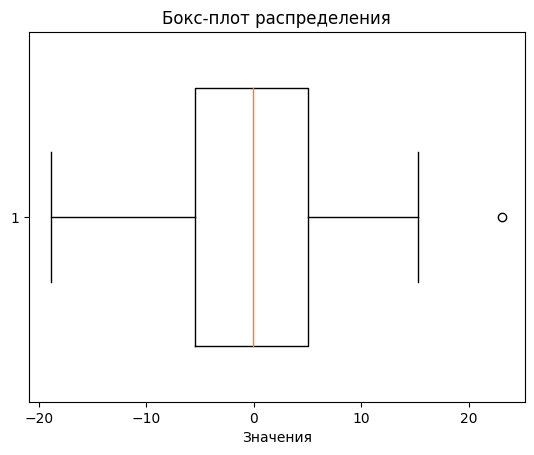

Ожидаемое число выбросов: 0


In [26]:
#построение бокс-плота
plt.boxplot(sample, vert=False, widths=0.7)
plt.xlabel('Значения')
plt.title('Бокс-плот распределения')
plt.show()
#статистическая интерпретация
mean_sample = np.mean(sample)
std_dev_sample = np.std(sample)
lower_limit = mean_sample - 3 * std_dev_sample
upper_limit = mean_sample + 3 * std_dev_sample
#подсчет числа выбросов в выборке
outliers = [x for x in sample if x < lower_limit or x > upper_limit]
expected_outliers = len(outliers)
print(f"Ожидаемое число выбросов: {expected_outliers}")

Оценка вероятности попадания в 3-ый интервал: 0.7077


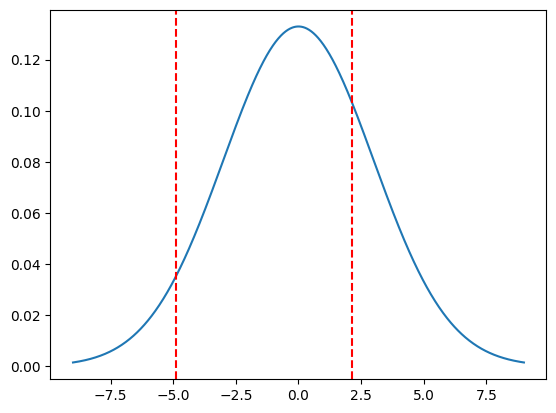

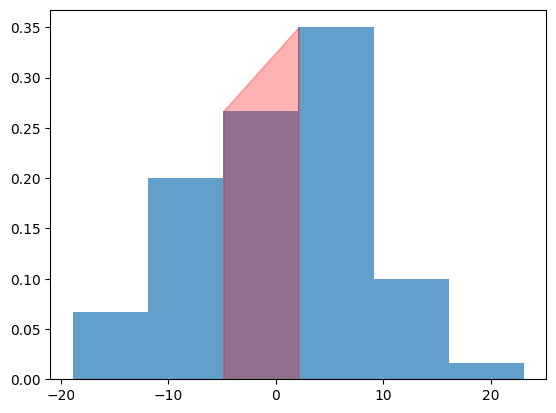

Оценка значения интегральной функции распределения в правой границе 3-ого интервала: 0.7599
Точное значение интегральной функции распределения в правой границе 3-ого интервала: 0.7599


In [27]:
interval_bounds = [(bin_edges[i], bin_edges[i + 1]) for i in range(len(bin_edges) - 1)] #границы интервалов
k_min, k_max = interval_bounds[k - 1]
k_probability = norm.cdf(k_max, loc=a, scale=np.sqrt(variance)) - norm.cdf(k_min, loc=a, scale=np.sqrt(variance))
print(f"Оценка вероятности попадания в {k}-ый интервал: { k_probability:.4f}")
x = np.linspace(a - 3 * np.sqrt(variance), a + 3 * np.sqrt(variance), 1000)
pdf = norm.pdf(x, loc=a, scale=np.sqrt(variance))
fig, ax = plt.subplots()
ax.plot(x, pdf, label='Плотность вероятности')
ax.axvline(k_min, color='red', linestyle='--')
ax.axvline(k_max, color='red', linestyle='--')
plt.show()
fig2, ax = plt.subplots()
ax.bar(bin_edges[:-1], relative_freq, width=np.diff(bin_edges), align='edge', alpha=0.7, label='Гистограмма относительных частот')
ax.fill_between(bin_edges[:-1], relative_freq, where=[(k_min <= xi <= k_max) for xi in bin_edges[:-1]], alpha=0.3, color='red')
plt.show()
cdf_in_right_boundary = norm.cdf(k_max, loc=a, scale=np.sqrt(variance))
exact_cdf_value = norm.cdf(k_max, loc=a, scale=np.sqrt(variance))
print(
    f"Оценка значения интегральной функции распределения в правой границе {k}-ого интервала: {cdf_in_right_boundary:.4f}")
print(f"Точное значение интегральной функции распределения в правой границе {k}-ого интервала: {exact_cdf_value:.4f}")

In [29]:
probability = norm.cdf(q + a, loc=a, scale=np.sqrt(variance)) - norm.cdf(-q + a, loc=a, scale=np.sqrt(variance))
print(f"Вероятность: {probability:.4f}")
count_within_interval = len([x for x in sample if -q + a <= x <= q + a])
relative_freq_probability = count_within_interval / n
print(f"Оценка вероятности по выборке: {relative_freq_probability:.4f}")


Вероятность: 0.4403
Оценка вероятности по выборке: 0.0833


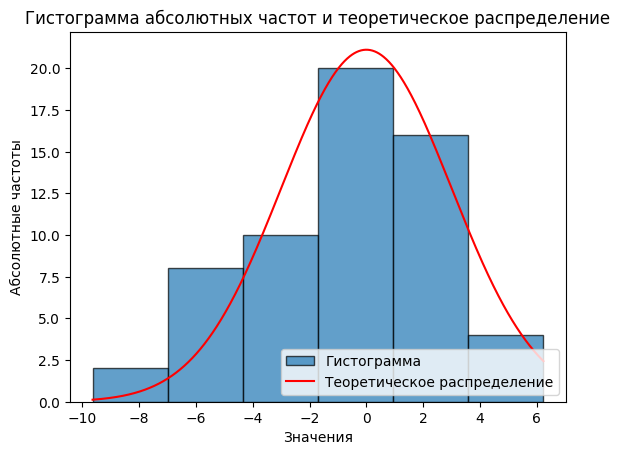

In [31]:
sample = np.random.normal(loc=a, scale=np.sqrt(variance), size=n)
interval_numbers = int(1 + math.log2(n))  # количество интервалов
hist, bin_edges = np.histogram(sample, bins=interval_numbers)  # интервальные границы
sum_absolute_freq = np.sum(hist)  # сумма абсолютных частот
plt.hist(sample, bins=bin_edges, edgecolor='k', alpha=0.7, label='Гистограмма') #построение гистограммы абсолютных частот
#построение графика теоретической частоты
x = np.linspace(min(sample), max(sample), 1000)
pdf = stats.norm.pdf(x, loc=a, scale=np.sqrt(variance))
plt.plot(x, pdf * sum_absolute_freq * np.diff(bin_edges)[0], 'r', label='Теоретическое распределение')
plt.xlabel('Значения')
plt.ylabel('Абсолютные частоты')
plt.title('Гистограмма абсолютных частот и теоретическое распределение')
plt.legend()
plt.show()


In [32]:
mean_estimate = np.mean(sample)
median_estimate = np.median(sample)
variance_estimate = np.var(sample, ddof=1)  # ddof=1 для использования выборочной дисперсии
std_deviation_estimate = np.std(sample, ddof=1)  # ddof=1 для использования выборочного стандартного отклонения
skewness_estimate = (1 / std_deviation_estimate * 3) * np.mean((sample - mean_estimate) * 3)
kurtosis_estimate = (1 / std_deviation_estimate * 4) * np.mean((sample - mean_estimate) * 4) - 3
print(f"Математическое ожидание: {mean_estimate:.4f}")
print(f"Медиана: {median_estimate:.4f}")
print(f"Дисперсия: {variance_estimate:.4f}")
print(f"Стандартное отклонение: {std_deviation_estimate:.4f}")
print(f"Коэффициент ассиметрии: {skewness_estimate:.4f}")
print(f"Эксцесс: {kurtosis_estimate:.4f}")

Математическое ожидание: -0.7719
Медиана: -0.1165
Дисперсия: 11.3847
Стандартное отклонение: 3.3741
Коэффициент ассиметрии: -0.0000
Эксцесс: -3.0000


In [33]:
describe_results = describe(sample)
print(f"Математическое ожидание: {describe_results.mean:.4f}")
print(f"Медиана: {np.median(sample):.4f}")
print(f"Дисперсия: {describe_results.variance:.4f}")
print(f"Стандартное отклонение: {np.sqrt(describe_results.variance):.4f}")
print(f"Коэффициент ассиметрии: {describe_results.skewness:.4f}")
print(f"Эксцесс: {describe_results.kurtosis:.4f}")

Математическое ожидание: -0.7719
Медиана: -0.1165
Дисперсия: 11.3847
Стандартное отклонение: 3.3741
Коэффициент ассиметрии: -0.4927
Эксцесс: -0.1218
